# Keras API Project Exercise


This notebook is from an exercise from the Python for Data Science and Machine Learning Bootcamp course (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/). It contains some different approaches from the exercise.


## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club. The dataset used in this project have some modifications to explore more featuring engineering techniques.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we'll try to build a model that can predict wether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Looking Data Info

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


# Importing Data

In [6]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Looking at numerical values

In [9]:
df_info = pd.DataFrame({'nomes' : df.columns, 'tipos' : df.dtypes,
                           'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})

In [10]:
df_info.loc[df_info['tipos']!='object']

,nomes,tipos,NA #,NA %
loan_amnt,loan_amnt,float64,0,0.000000
int_rate,int_rate,float64,0,0.000000
installment,installment,float64,0,0.000000
annual_inc,annual_inc,float64,0,0.000000
dti,dti,float64,0,0.000000
open_acc,open_acc,float64,0,0.000000
pub_rec,pub_rec,float64,0,0.000000
revol_bal,revol_bal,float64,0,0.000000
revol_util,revol_util,float64,276,0.069692
total_acc,total_acc,float64,0,0.000000


#### loan_status is our label

In [11]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='loan_status', ylabel='count'>

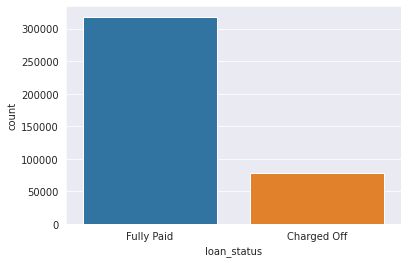

In [12]:
sns.countplot(data=df, x='loan_status') 

# there's two categories in the label
# there's some disbalance in the target data, so we need to pay attention to the precision and the recall more than in the accuracy

#### loan_amnt is an important feature, let's look at it: first a distribution of values, then a distribution with hue='loan_status'

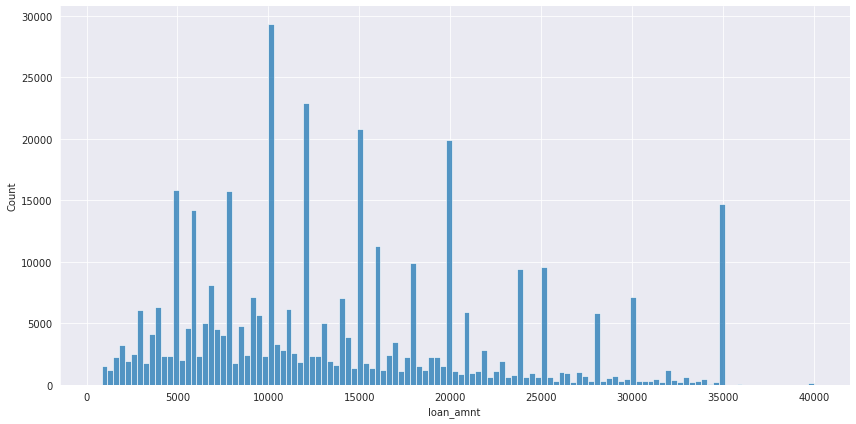

In [13]:
sns.displot(data=df, x='loan_amnt', kde=False, height=6, aspect=2)

# the marjority of the loans have values until 20000

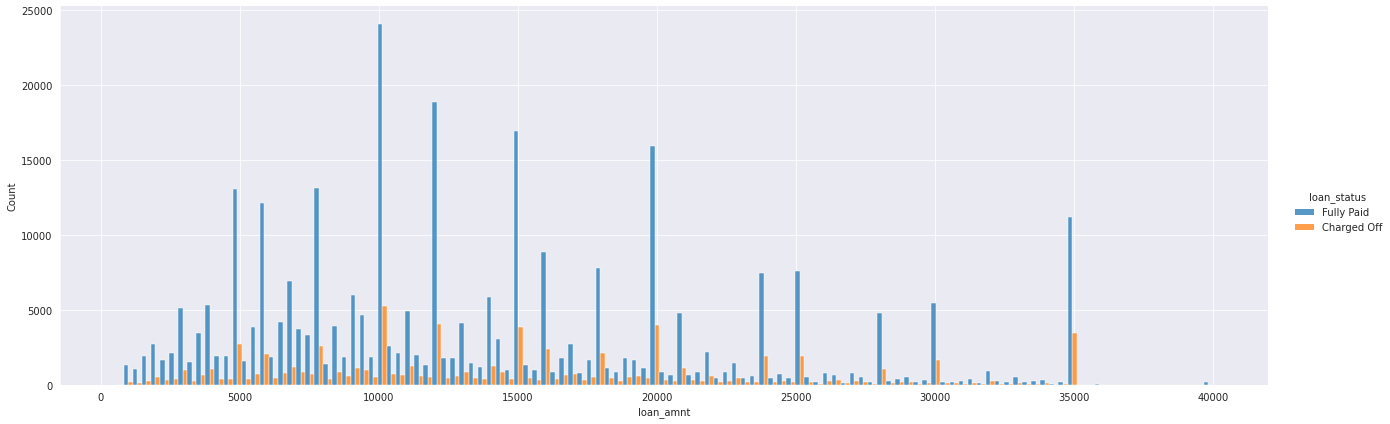

In [14]:
sns.displot(data=df, x='loan_amnt', kde=False, height=6, aspect=3, hue='loan_status', multiple='dodge')

# the bigger the loan, bigger the proportion of Charged Off loans

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

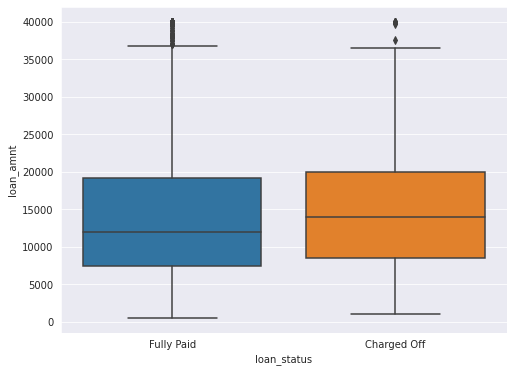

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

# there's no huge difference between the two status, but there's some... we can see that the mean is a little higher with Charged Off

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### let's see the correlation of the loan_amnt with the other numerical features

<AxesSubplot:>

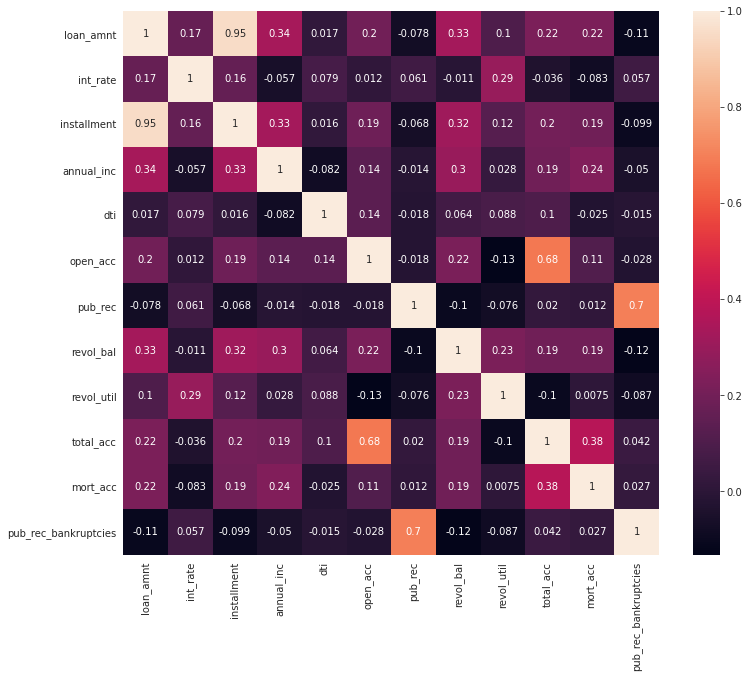

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True)

In [18]:
df.corr()['loan_amnt'].sort_values()

# the metric installment has a strong correlation with the loan_amount

pub_rec_bankruptcies   -0.106539
pub_rec                -0.077779
dti                     0.016636
revol_util              0.099911
int_rate                0.168921
open_acc                0.198556
mort_acc                0.222315
total_acc               0.223886
revol_bal               0.328320
annual_inc              0.336887
installment             0.953929
loan_amnt               1.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

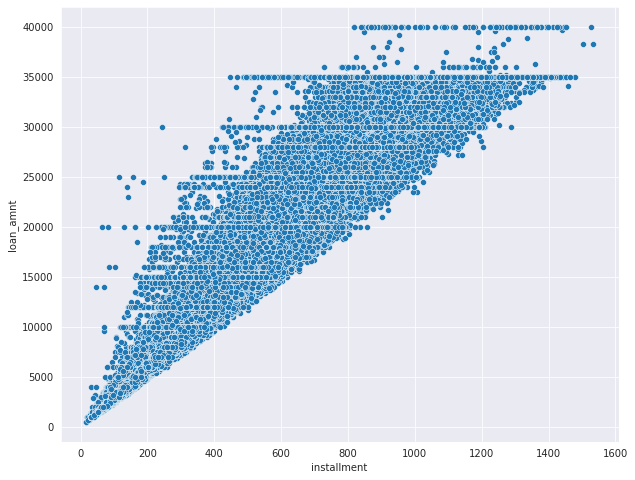

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='installment', y='loan_amnt')

In [20]:
feat_info('installment')

# it makes sense the correlation because we saw that the bigger the loan, the bigger the proportion of Charged Off loans, so the bigger the owed amount

The monthly payment owed by the borrower if the loan originates.


#### exploring grade e sub_grade

In [21]:
feat_info('grade')

LC assigned loan grade


In [22]:
feat_info('sub_grade')

LC assigned loan subgrade


<AxesSubplot:xlabel='grade', ylabel='count'>

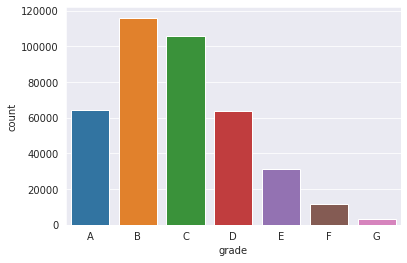

In [23]:
order = df['grade'].sort_values().unique()
sns.countplot(data=df, x='grade', order=order)

# there's a concentration on the B and C categories

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

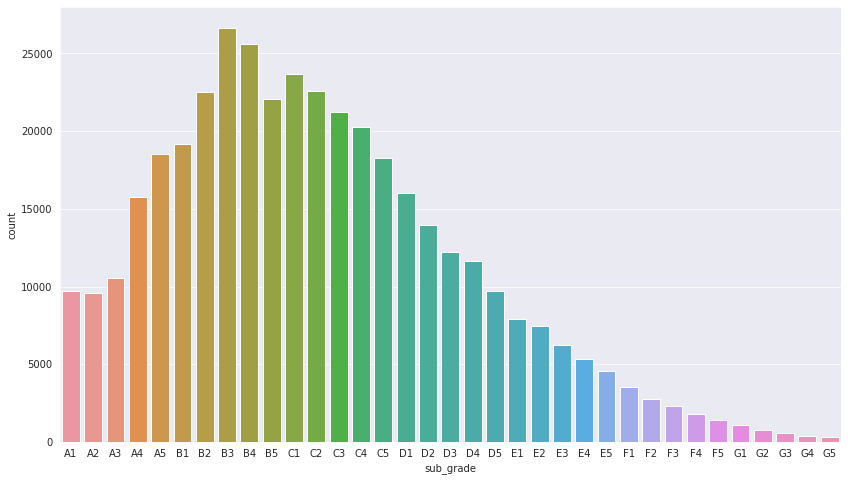

In [24]:
order = df['sub_grade'].sort_values().unique()
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='sub_grade', order=order)

# clearly is a concentration between the B and C categories, but the sub_grade shows that even inside these categories, there're subcategories that concentrate the loans, so this describes better the loans 
# than the grade column

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

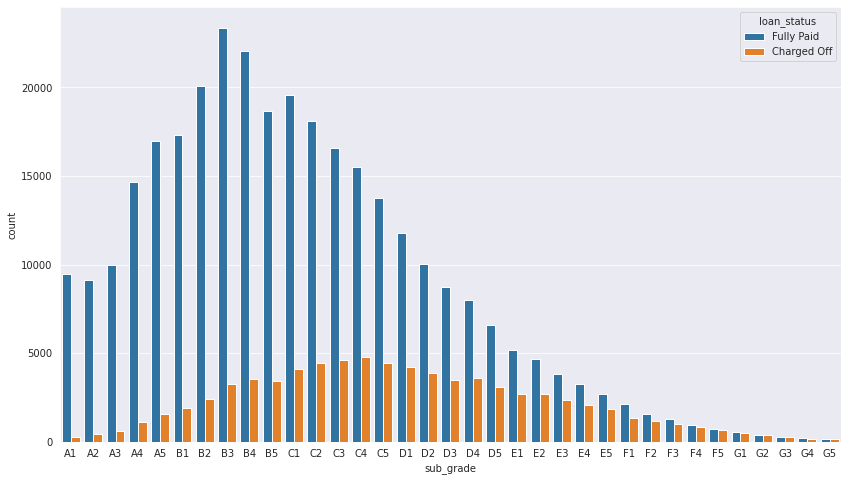

In [25]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='sub_grade', order=order, hue='loan_status')

# we can see that higher the category, higher the portion of loans Charged Off

#### our label is the columns loan_status that's an object, so let's create another column converting it to an integer binary column

In [26]:
df['status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

<AxesSubplot:>

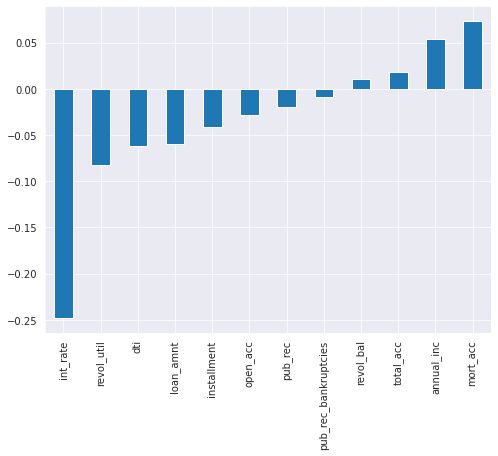

In [27]:
plt.figure(figsize=(8, 6))
df.corr()['status'][:-1].sort_values().plot(kind='bar')

# correlation between our target and other features

____
# Feature Engineering

### Dealing with Missing Values

#### Numerical 

In [28]:
df_info = pd.DataFrame({'nomes' : df.columns, 'tipos' : df.dtypes,
                           'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})

df_info.loc[df_info['tipos']!='object']

# the revol_util missing data represents only 0.07% of the total data, so there's no problem in dropping the rows
# the pub_rec_bankruptcies missing data represents only 0,1% of the total data, so there's no problem in dropping the rows as well
# the mort_acc missing data represents almost 10% of the total data, it's a lot to drop, so we'll try to fill these values

# we're gonna drop revol_util and pub_rec_bankruptcies missing values later

,nomes,tipos,NA #,NA %
loan_amnt,loan_amnt,float64,0,0.000000
int_rate,int_rate,float64,0,0.000000
installment,installment,float64,0,0.000000
annual_inc,annual_inc,float64,0,0.000000
dti,dti,float64,0,0.000000
open_acc,open_acc,float64,0,0.000000
pub_rec,pub_rec,float64,0,0.000000
revol_bal,revol_bal,float64,0,0.000000
revol_util,revol_util,float64,276,0.069692
total_acc,total_acc,float64,0,0.000000


#### filling up mort_acc

In [29]:
feat_info('mort_acc')

Number of mortgage accounts.


In [30]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [31]:
df.corr()['mort_acc'].sort_values()

# looking the correlation of column mort_acc with the others, total_acc seems to be the column with the higher correlation

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
status                  0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [32]:
# looking at the column total_acc

feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [33]:
df['total_acc'].unique()

array([ 25.,  27.,  26.,  13.,  43.,  23.,  15.,  40.,  37.,  61.,  35.,
        22.,  20.,  36.,  38.,   7.,  18.,  10.,  17.,  29.,  16.,  21.,
        34.,   9.,  14.,  59.,  41.,  19.,  12.,  30.,  56.,  24.,  28.,
         8.,  52.,  31.,  44.,  39.,  50.,  11.,  62.,  32.,   5.,  33.,
        46.,  42.,   6.,  49.,  45.,  57.,  48.,  67.,  47.,  51.,  58.,
         3.,  55.,  63.,  53.,   4.,  71.,  69.,  54.,  64.,  81.,  72.,
        60.,  68.,  65.,  73.,  78.,  84.,   2.,  76.,  75.,  79.,  87.,
        77., 104.,  89.,  70., 105.,  97.,  66., 108.,  74.,  80.,  82.,
        91.,  93., 106.,  90.,  85.,  88.,  83., 111.,  86., 101., 135.,
        92.,  94.,  95.,  99., 102., 129., 110., 124., 151., 107., 118.,
       150., 115., 117.,  96.,  98., 100., 116., 103.])

In [34]:
df.groupby('total_acc', as_index=False).mean()[['total_acc', 'mort_acc']]

# we will use the mean of the mort_acc with respect to the total_acc to fill up the missing data

,total_acc,mort_acc
0,2.0,0.000000
1,3.0,0.052023
2,4.0,0.066743
3,5.0,0.103289
4,6.0,0.151293
...,...,...
113,124.0,1.000000
114,129.0,1.000000
115,135.0,3.000000
116,150.0,2.000000


In [35]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [36]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [37]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#### Categorical

In [38]:
df_info = pd.DataFrame({'nomes' : df.columns, 'tipos' : df.dtypes,
                           'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})

df_info.loc[df_info['tipos']=='object']

# emp_title has almost 6% of it's data missing, we may look if the column has value to the model before decide with we fill up the data or drop the column
# same thing for emp_lenght
# title has just 0.4% of missing data, we may drop theses rows

,nomes,tipos,NA #,NA %
term,term,object,0,0.000000
grade,grade,object,0,0.000000
sub_grade,sub_grade,object,0,0.000000
emp_title,emp_title,object,22927,5.789208
emp_length,emp_length,object,18301,4.621115
home_ownership,home_ownership,object,0,0.000000
verification_status,verification_status,object,0,0.000000
issue_d,issue_d,object,0,0.000000
loan_status,loan_status,object,0,0.000000
purpose,purpose,object,0,0.000000


##### looking at emp_title

In [39]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [40]:
df['emp_title'].nunique()

# the column has too many unique values and it's not feasible to be filled in this case, so let's drop the column

173105

In [41]:
df.drop('emp_title', axis=1, inplace=True)

##### looking at emp_lenght

In [42]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [43]:
df['emp_length'].nunique()

11

In [44]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [45]:
order= ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

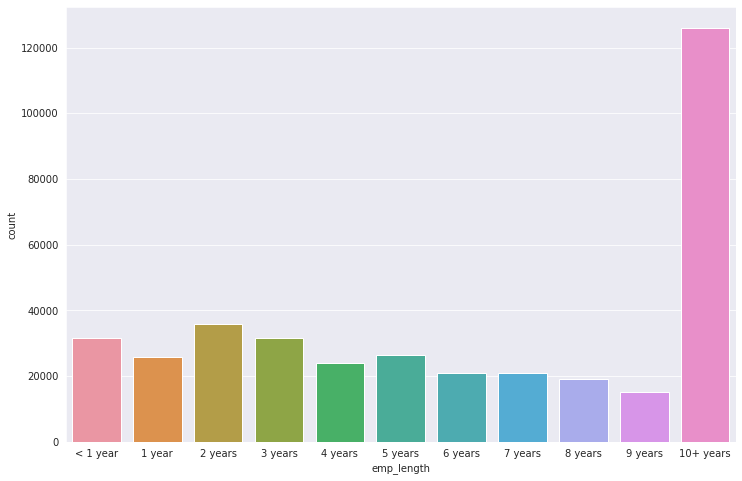

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='emp_length', order=order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

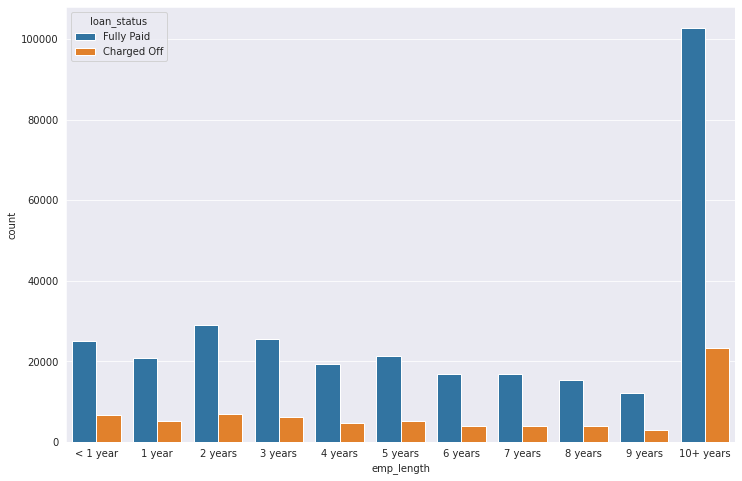

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='emp_length', hue='loan_status', order=order)

# this countplots doesn't tell us much about a possible relationship

In [48]:
df.loc[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']/df.loc[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

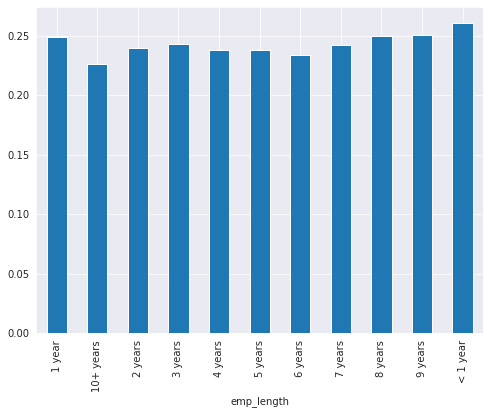

In [49]:
plt.figure(figsize=(8,6))
(df.loc[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']/df.loc[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']).plot(kind='bar')

# there's no correlation between emp_length and loan_status, so we can drop the column

In [50]:
df.drop('emp_length', axis=1, inplace=True)

##### looking at title

In [51]:
feat_info('title')

The loan title provided by the borrower


In [52]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [53]:
df['title'].nunique()

# this feature has a lot of unique values and the missing data represents only 0,4% of the data, so we'll drop the rows too

48817

##### resume treatment of missing values

In [54]:
pd.DataFrame({'nomes' : df.columns, 'tipos' : df.dtypes,
                           'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})

,nomes,tipos,NA #,NA %
loan_amnt,loan_amnt,float64,0,0.000000
term,term,object,0,0.000000
int_rate,int_rate,float64,0,0.000000
installment,installment,float64,0,0.000000
grade,grade,object,0,0.000000
sub_grade,sub_grade,object,0,0.000000
home_ownership,home_ownership,object,0,0.000000
annual_inc,annual_inc,float64,0,0.000000
verification_status,verification_status,object,0,0.000000
issue_d,issue_d,object,0,0.000000


In [55]:
# dropping title, revol_util and pub_rec_bankruptcies rows

df.dropna(inplace=True)

In [56]:
# we saw that grade and subgrade bring similar information and sub_grade is more informative, so let's drop grade

df.drop('grade', axis=1, inplace=True)

In [57]:
# we already saw:
# loan_amnt, installment, sub_grade, title, revol_util, total_acc, mort_acc, pub_rec_bankruptcies, status
# let's have a look at the remaining columns 'term', 'int_rate', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
#       'revol_bal', 'initial_list_status', 'application_type', 'address'

df[['term', 'int_rate', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec','revol_bal', 'initial_list_status', 'application_type', 'address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393465 entries, 0 to 396029
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 393465 non-null  object 
 1   int_rate             393465 non-null  float64
 2   home_ownership       393465 non-null  object 
 3   annual_inc           393465 non-null  float64
 4   verification_status  393465 non-null  object 
 5   issue_d              393465 non-null  object 
 6   purpose              393465 non-null  object 
 7   dti                  393465 non-null  float64
 8   earliest_cr_line     393465 non-null  object 
 9   open_acc             393465 non-null  float64
 10  pub_rec              393465 non-null  float64
 11  revol_bal            393465 non-null  float64
 12  initial_list_status  393465 non-null  object 
 13  application_type     393465 non-null  object 
 14  address              393465 non-null  object 
dtypes: float64(6), ob

##### term

In [58]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [59]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

<AxesSubplot:xlabel='term', ylabel='count'>

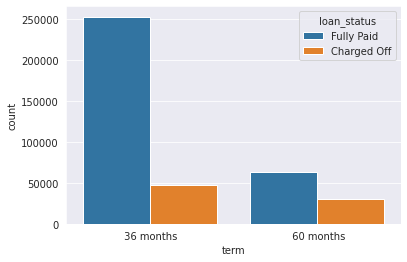

In [60]:
sns.countplot(data=df, x='term', hue='loan_status')

# seems like the 36 months category has a bigger percentage of Fully Paid loans

In [61]:
# map term to int values

df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})

##### int_rate

In [62]:
feat_info('int_rate')

Interest Rate on the loan


In [63]:
df['int_rate'].nunique()

532

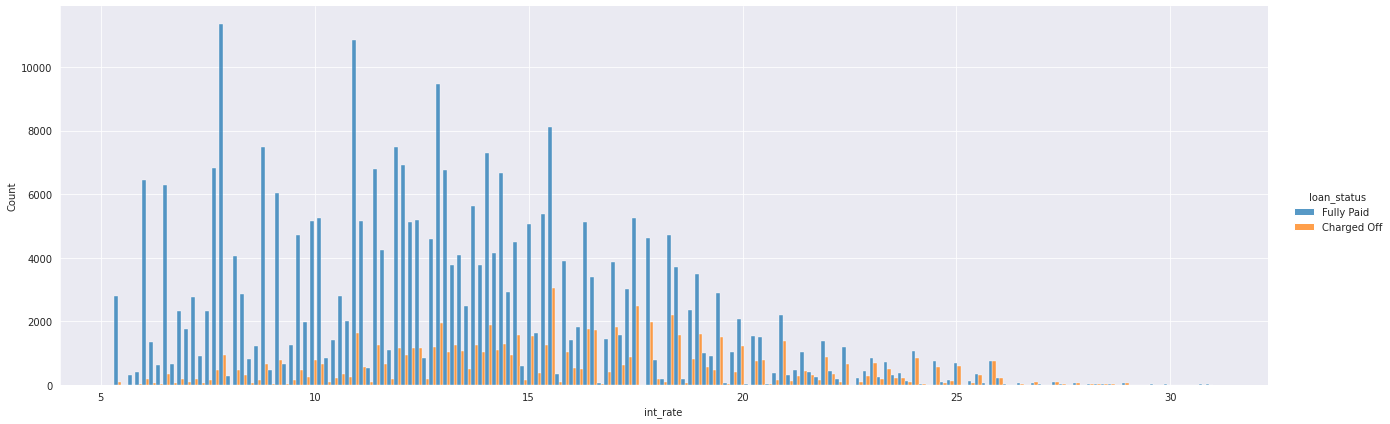

In [64]:
sns.displot(data=df, x='int_rate', aspect=3, height=6, hue='loan_status', multiple='dodge')

# the bigger the int_rate, the bigger the percentage Charged Off, it makes sense...

##### home_ownership

In [65]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [66]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

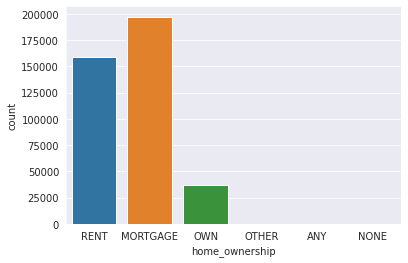

In [67]:
sns.countplot(data=df, x='home_ownership')

# ANY and NONE can be added to the OTHER category

In [68]:
df.loc[(df['home_ownership']=='ANY')|(df['home_ownership']=='NONE'), 'home_ownership'] = 'OTHER'

##### annual_inc

In [69]:
feat_info('annual_inc')

The self-reported annual income provided by the borrower during registration.


In [70]:
df['annual_inc'].nunique()

27050

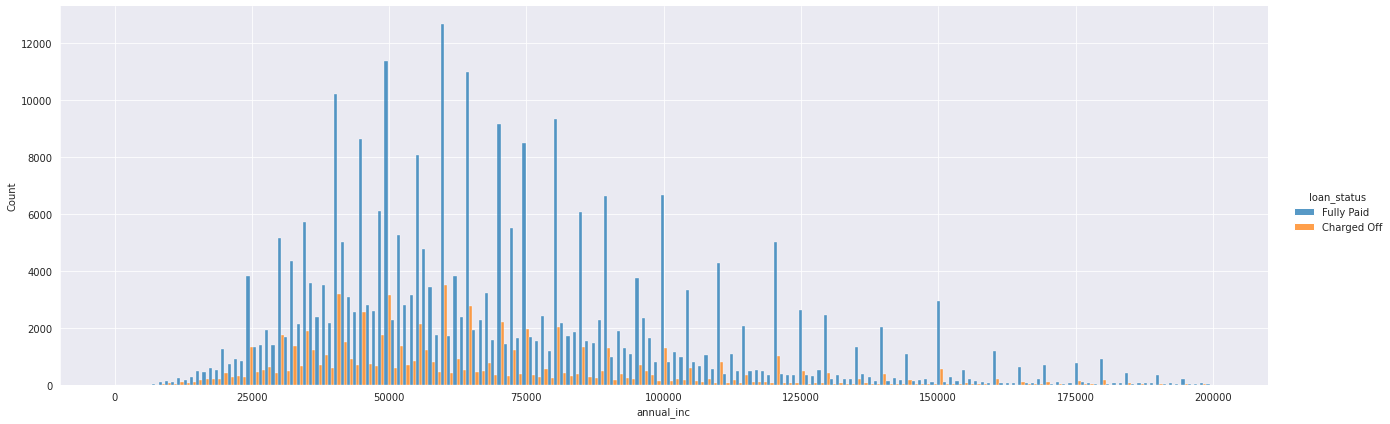

In [71]:
sns.displot(data=df.loc[df['annual_inc']<200000], x='annual_inc', aspect=3, height=6, hue='loan_status', multiple='dodge')

# this information seems to have some correltion as the annual_inc numbers increase

In [72]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77194.0,67543.753728,58391.235997,0.0,42000.0,59000.0,80000.0,8706582.0
Fully Paid,316271.0,75839.921579,62284.928972,600.0,46200.0,65000.0,90000.0,7600000.0


##### verification_status

In [73]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [74]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

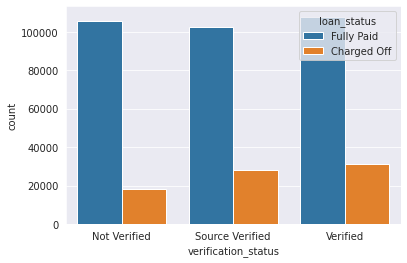

In [75]:
sns.countplot(data=df, x='verification_status', hue='loan_status')

In [76]:
df.loc[df['loan_status']=='Charged Off'].groupby('verification_status').count()['loan_status']/df.loc[df['loan_status']=='Fully Paid'].groupby('verification_status').count()['loan_status']

# there's no big difference between the verification status, may we drop the column

verification_status
Not Verified       0.171237
Source Verified    0.273926
Verified           0.287212
Name: loan_status, dtype: float64

##### issue_d

In [77]:
feat_info('issue_d')

The month which the loan was funded


In [78]:
df['issue_d'].unique()

# this information are not too useful in our case, we can drop it

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [79]:
df.drop('issue_d', axis=1, inplace=True)

##### purpose

In [80]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [81]:
df['purpose'].unique()

# this looks a lot like the title category

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [82]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [83]:
df['title'].nunique()

# we'll drop the column title because these two columns are redundant and the title columns are much bigger than the purpose column

48472

In [84]:
df.drop('title', axis=1, inplace=True)

##### dti

In [85]:
feat_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [86]:
df['dti'].unique()

array([26.24, 22.05, 12.79, ..., 40.56, 47.09, 55.53])

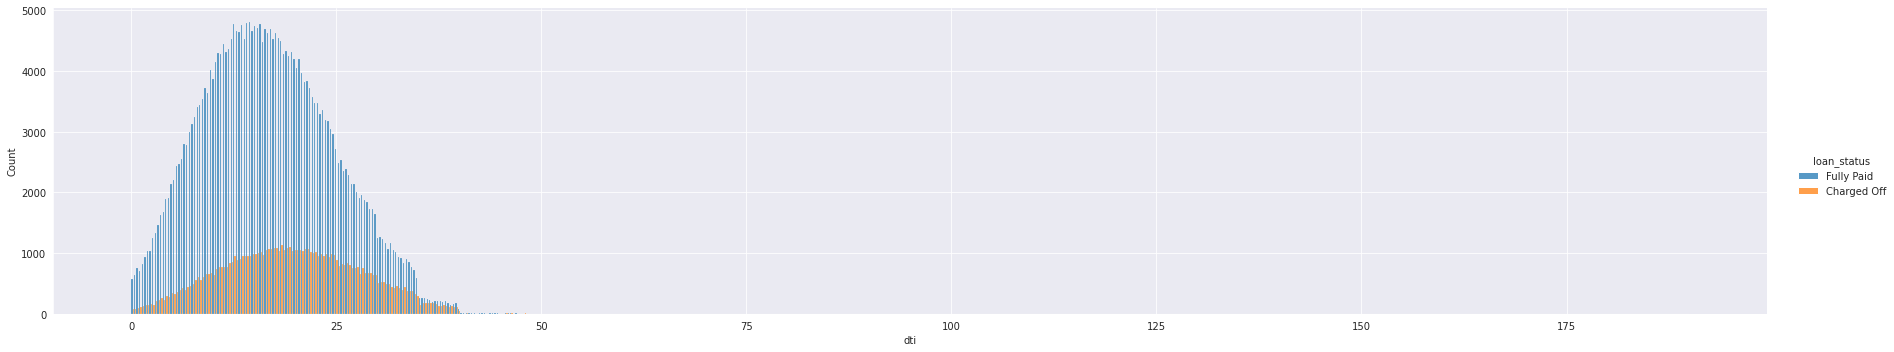

In [87]:
sns.displot(data=df.loc[df['dti']<200], x='dti', hue='loan_status', aspect=5, multiple='dodge')

In [88]:
# this metric is the relation between two other metrics that are also in our data, so let's look at it's correlations
# seems that there's no high correlation between the features, so let's keep all of it

df[['dti', 'installment', 'annual_inc']].corr()['dti']

dti            1.000000
installment    0.015475
annual_inc    -0.081409
Name: dti, dtype: float64

##### earliest_cr_line

In [89]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [90]:
df['earliest_cr_line'].nunique()

683

In [91]:
# df['earliest_cr_line'].unique()

# let's extract the year

In [92]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df.drop('earliest_cr_line', axis=1, inplace=True)

##### open_acc

In [93]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


In [94]:
df['open_acc'].unique()

array([16., 17., 13.,  6.,  8., 11.,  5., 30.,  9., 15., 12., 10., 18.,
        7.,  4., 14., 20., 19., 21., 23.,  3., 26., 42., 22., 25., 28.,
        2., 34., 24., 27., 31., 32., 33.,  1., 29., 36., 40., 35., 37.,
       41., 44., 39., 49., 48., 38., 51., 50., 43., 46., 47., 57., 53.,
       58., 52., 54., 45., 90., 56., 55., 76.])

##### pub_rec

In [95]:
feat_info('pub_rec')

Number of derogatory public records


In [96]:
df['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

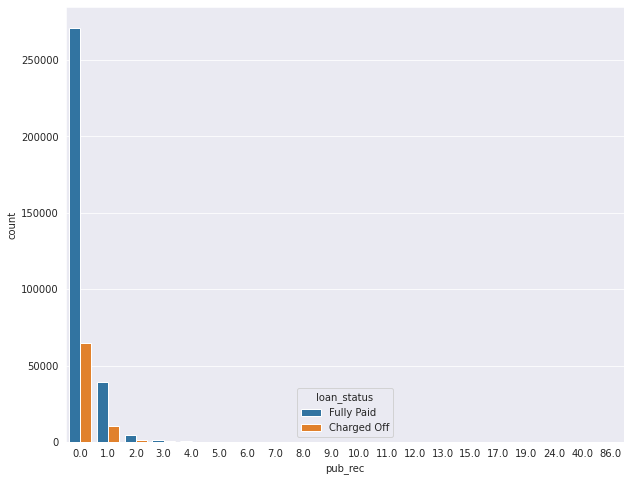

In [97]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='pub_rec', hue='loan_status')

##### reavol_bal

In [98]:
feat_info('revol_bal')

Total credit revolving balance


In [99]:
df['revol_bal'].nunique()

55491

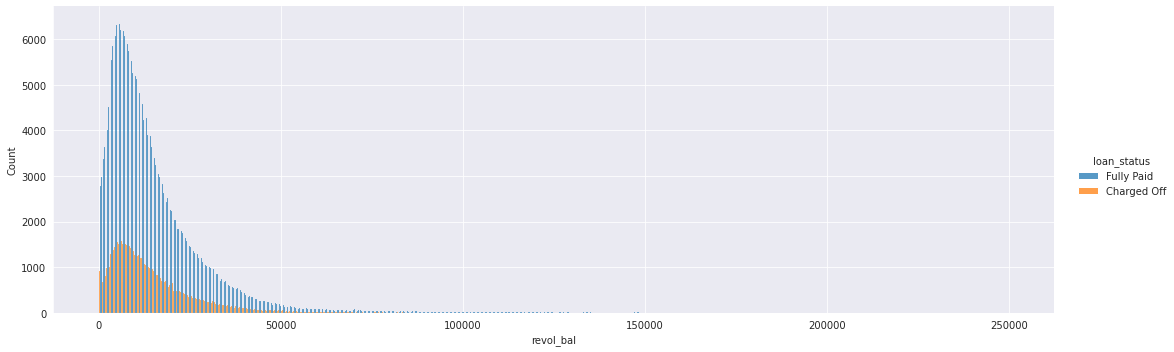

In [100]:
sns.displot(data=df.loc[df['revol_bal']<250000], x='revol_bal', hue='loan_status', multiple='dodge', aspect=3)

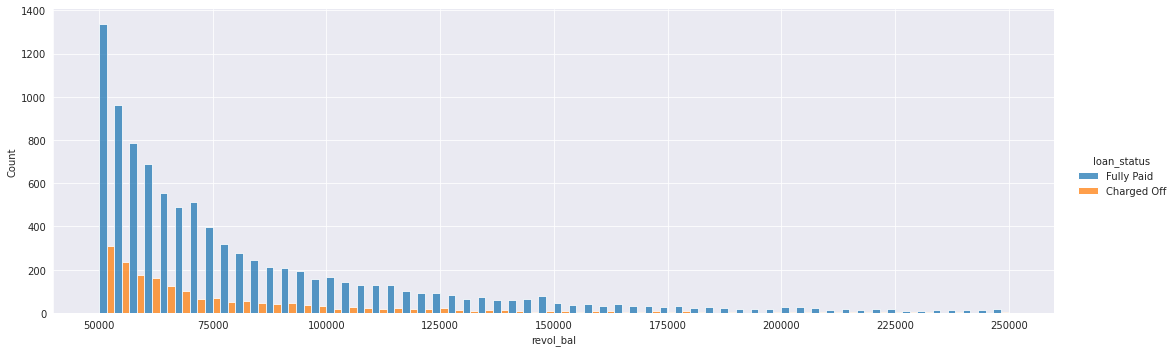

In [101]:
sns.displot(data=df.loc[(df['revol_bal']>50000)&(df['revol_bal']<250000)], x='revol_bal', hue='loan_status', multiple='dodge', aspect=3)

##### initial_list_status

In [102]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [103]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

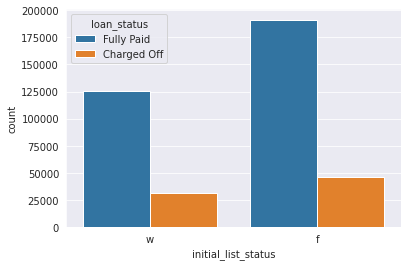

In [104]:
sns.countplot(data=df, x='initial_list_status', hue='loan_status')

##### application_type

In [105]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [106]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

<AxesSubplot:xlabel='application_type', ylabel='count'>

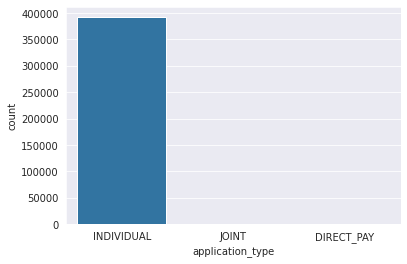

In [107]:
sns.countplot(data=df, x='application_type')

# we can drop this column

In [108]:
df.drop('application_type', axis=1, inplace=True)

##### address

In [109]:
df['address']

# let's use the zip code of the address and drop the address column

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 393465, dtype: object

In [110]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
df.drop('address', axis=1, inplace=True)

In [111]:
# we created a column status to use as label, so we'll drop the loan_status

df.drop('loan_status', axis=1, inplace=True)

In [112]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'status',
       'earliest_cr_year', 'zip_code'],
      dtype='object')

In [113]:
df_info = pd.DataFrame({'nomes' : df.columns, 'tipos' : df.dtypes,
                           'NA #': df.isna().sum(), 'NA %' : (df.isna().sum() / df.shape[0]) * 100})
df_info.loc[df_info['tipos']=='object']['nomes']

sub_grade                        sub_grade
home_ownership              home_ownership
verification_status    verification_status
purpose                            purpose
initial_list_status    initial_list_status
zip_code                          zip_code
Name: nomes, dtype: object

## Encoding

In [114]:
df[['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'zip_code']]

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status,zip_code
0,36,B4,RENT,Not Verified,vacation,w,22690
1,36,B5,MORTGAGE,Not Verified,debt_consolidation,f,05113
2,36,B3,RENT,Source Verified,credit_card,f,05113
3,36,A2,RENT,Not Verified,credit_card,f,00813
4,60,C5,MORTGAGE,Verified,credit_card,f,11650
...,...,...,...,...,...,...,...
396025,60,B4,RENT,Source Verified,debt_consolidation,w,30723
396026,36,C1,MORTGAGE,Source Verified,debt_consolidation,f,05113
396027,36,B1,RENT,Verified,debt_consolidation,f,70466
396028,60,C2,MORTGAGE,Verified,debt_consolidation,f,29597


In [115]:
# transforming categorical features into dummy variables

dummies = pd.get_dummies(df[['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'zip_code']], drop_first=True)

In [116]:
# drop columns we turn to dummies and concat the data

df.drop(['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'zip_code'], axis=1, inplace=True)

In [117]:
df_final = pd.concat([df, dummies], axis=1)

In [118]:
df_final.shape

(393465, 77)

___
# Splitting and Normalizing

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df_final.drop('status', axis=1).values

In [121]:
y = df_final['status'].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

___
# Normalizing

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

___
# Building the Model

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
model = Sequential()

model = Sequential()
model.add(Dense(units=77,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=38,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) # defining the variable

In [127]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
1030/1030 [==============================] - 4s 3ms/step - loss: 0.3033 - val_loss: 0.2672
Epoch 2/100
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2650 - val_loss: 0.2645
Epoch 3/100
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2625 - val_loss: 0.2632
Epoch 4/100
1030/1030 [==============================] - 4s 4ms/step - loss: 0.2610 - val_loss: 0.2626
Epoch 5/100
1030/1030 [==============================] - 5s 5ms/step - loss: 0.2601 - val_loss: 0.2624
Epoch 6/100
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2598 - val_loss: 0.2622
Epoch 7/100
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2589 - val_loss: 0.2621
Epoch 8/100
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2585 - val_loss: 0.2617
Epoch 9/100
1030/1030 [==============================] - 3s 3ms/step - loss: 0.2582 - val_loss: 0.2619
Epoch 10/100
1030/1030 [==============================] - 2s 2ms/step - l

<AxesSubplot:>

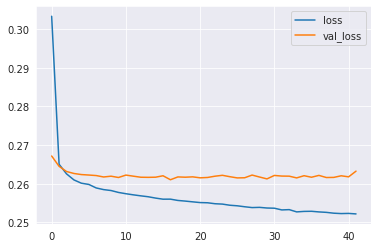

In [128]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [129]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report,confusion_matrix

# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     25668
           1       0.88      1.00      0.93    104176

    accuracy                           0.89    129844
   macro avg       0.92      0.72      0.77    129844
weighted avg       0.90      0.89      0.87    129844

[[ 11357  14311]
 [   379 103797]]


In [130]:
confusion_matrix(y_test,predictions)

array([[ 11357,  14311],
       [   379, 103797]])